In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [6]:
df = pd.read_csv('survey lung cancer.csv')

# Standardise column names (all uppercase)
df.columns = df.columns.str.upper()


In [7]:
print(df.head())
print(df.shape)          # rows, columns
print(df.columns)        # column names
print(df.dtypes)         # data types


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [8]:
# Check and remove duplicate records
print('Total duplicate rows:', df.duplicated().sum())
data = df.drop_duplicates()

# Fix column name issues
data.columns = (
    data.columns
    .str.strip()
    .str.upper()
    .str.replace(' ', '_')
)

# Display updated dataset (shows columns after cleaning)
print(data)

# Check missing values
print('Missing values per column:\n', data.isnull().sum())


Total duplicate rows: 33
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
279      F   59        1               2        2              2   
280      F   59        2               1        1              1   
281      M   55        2               1        1              1   
282      M   46        1               2        2              1   
283      M   60        1               2        2              1   

     CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                  1        2        1         2                  2         2

In [9]:
normalized_data = data.copy()

scaler = MinMaxScaler()
normalized_data['NORMALIZED_AGE'] = scaler.fit_transform(
    normalized_data[['AGE']]
)

normalized_data[['AGE', 'NORMALIZED_AGE']].head()


,AGE,NORMALIZED_AGE
0,69,0.727273
1,74,0.803030
2,59,0.575758
3,63,0.636364
4,63,0.636364


In [10]:
bins = [20, 40, 60, 100]
labels = ['Young', 'Middle-aged', 'Old']

normalized_data['AGE_GROUP'] = pd.cut(
    normalized_data['AGE'],
    bins=bins,
    labels=labels
)

normalized_data[['AGE', 'AGE_GROUP']].head()


,AGE,AGE_GROUP
0,69,Old
1,74,Old
2,59,Middle-aged
3,63,Old
4,63,Old


In [11]:
encoded_data = pd.get_dummies(
    normalized_data,
    columns=['GENDER', 'AGE_GROUP', 'LUNG_CANCER'],
    dtype=int
)

cols_order = [
    'GENDER_F', 'GENDER_M', 'AGE', 'NORMALIZED_AGE',
    'AGE_GROUP_Young', 'AGE_GROUP_Middle-aged', 'AGE_GROUP_Old'
] + [c for c in encoded_data.columns if c not in [
    'GENDER_F', 'GENDER_M', 'AGE', 'NORMALIZED_AGE',
    'AGE_GROUP_Young', 'AGE_GROUP_Middle-aged', 'AGE_GROUP_Old'
]]

encoded_data = encoded_data[cols_order]
encoded_data.head()


,GENDER_F,GENDER_M,AGE,NORMALIZED_AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,SMOKING,YELLOW_FINGERS,ANXIETY,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_NO,LUNG_CANCER_YES
0,0,1,69,0.727273,0,0,1,1,2,2,...,2,1,2,2,2,2,2,2,0,1
1,0,1,74,0.803030,0,0,1,2,1,1,...,2,2,1,1,1,2,2,2,0,1
2,1,0,59,0.575758,0,1,0,1,1,1,...,2,1,2,1,2,2,1,2,1,0
3,0,1,63,0.636364,0,0,1,2,2,2,...,1,1,1,2,1,1,2,2,1,0
4,1,0,63,0.636364,0,0,1,1,2,1,...,1,1,2,1,2,2,1,1,1,0


In [12]:
encoded_data.to_csv('lung_cancer_preprocessed_data.csv', index=False)
print('Preprocessed dataset saved successfully.')


Preprocessed dataset saved successfully.


In [13]:
df = pd.read_csv('lung_cancer_preprocessed_data.csv')
df.head()


,GENDER_F,GENDER_M,AGE,NORMALIZED_AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,SMOKING,YELLOW_FINGERS,ANXIETY,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_NO,LUNG_CANCER_YES
0,0,1,69,0.727273,0,0,1,1,2,2,...,2,1,2,2,2,2,2,2,0,1
1,0,1,74,0.803030,0,0,1,2,1,1,...,2,2,1,1,1,2,2,2,0,1
2,1,0,59,0.575758,0,1,0,1,1,1,...,2,1,2,1,2,2,1,2,1,0
3,0,1,63,0.636364,0,0,1,2,2,2,...,1,1,1,2,1,1,2,2,1,0
4,1,0,63,0.636364,0,0,1,1,2,1,...,1,1,2,1,2,2,1,1,1,0


In [14]:
age_mean = df['AGE'].mean()
age_variance = df['AGE'].var(ddof=0)
age_std = df['AGE'].std(ddof=0)

print('Descriptive statistics for AGE:')
print(f"Mean: {age_mean:.3f}")
print(f"Variance: {age_variance:.3f}")
print(f"Standard Deviation: {age_std:.3f}")


Descriptive statistics for AGE:
Mean: 62.909
Variance: 69.959
Standard Deviation: 8.364


In [15]:
age_group_cols = [col for col in df.columns if 'AGE_GROUP' in col]

print('Mean values:')
print(df[age_group_cols].mean())

print('\nVariance values:')
print(df[age_group_cols].var(ddof=0))

print('\nStandard deviation values:')
print(df[age_group_cols].std(ddof=0))


Mean values:
AGE_GROUP_Young          0.010870
AGE_GROUP_Middle-aged    0.380435
AGE_GROUP_Old            0.608696
dtype: float64

Variance values:
AGE_GROUP_Young          0.010751
AGE_GROUP_Middle-aged    0.235704
AGE_GROUP_Old            0.238185
dtype: float64

Standard deviation values:
AGE_GROUP_Young          0.103689
AGE_GROUP_Middle-aged    0.485494
AGE_GROUP_Old            0.488042
dtype: float64


In [16]:
gender_cols = ['GENDER_M', 'GENDER_F']

print('Mean:')
print(df[gender_cols].mean())

print('\nVariance:')
print(df[gender_cols].var())

print('\nStandard Deviation:')
print(df[gender_cols].std())


Mean:
GENDER_M    0.514493
GENDER_F    0.485507
dtype: float64

Variance:
GENDER_M    0.250698
GENDER_F    0.250698
dtype: float64

Standard Deviation:
GENDER_M    0.500698
GENDER_F    0.500698
dtype: float64


In [17]:
lung_col = 'LUNG_CANCER_YES'

lung_mean = df[lung_col].mean()
lung_variance = df[lung_col].var(ddof=0)
lung_std = df[lung_col].std(ddof=0)

print('Lung cancer statistics:')
print(f"Mean: {lung_mean:.3f}")
print(f"Variance: {lung_variance:.3f}")
print(f"Standard Deviation: {lung_std:.3f}")


Lung cancer statistics:
Mean: 0.862
Variance: 0.119
Standard Deviation: 0.345


In [18]:
mode_cols = [
    'AGE', 'AGE_GROUP_Young', 'AGE_GROUP_Middle-aged', 'AGE_GROUP_Old',
    'GENDER_F', 'GENDER_M', 'LUNG_CANCER_NO', 'LUNG_CANCER_YES'
]

df[mode_cols].mode().iloc[0]


AGE                      64
AGE_GROUP_Young           0
AGE_GROUP_Middle-aged     0
AGE_GROUP_Old             1
GENDER_F                  0
GENDER_M                  1
LUNG_CANCER_NO            0
LUNG_CANCER_YES           1
Name: 0, dtype: int64

In [19]:
numeric_cols = [
    'AGE', 'AGE_GROUP_Young', 'AGE_GROUP_Middle-aged', 'AGE_GROUP_Old',
    'GENDER_F', 'GENDER_M', 'LUNG_CANCER_NO', 'LUNG_CANCER_YES'
]

df[numeric_cols].describe()


,AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,GENDER_F,GENDER_M,LUNG_CANCER_NO,LUNG_CANCER_YES
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,0.010870,0.380435,0.608696,0.485507,0.514493,0.137681,0.862319
std,8.379355,0.103877,0.486376,0.488929,0.500698,0.500698,0.345191,0.345191
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,62.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,69.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


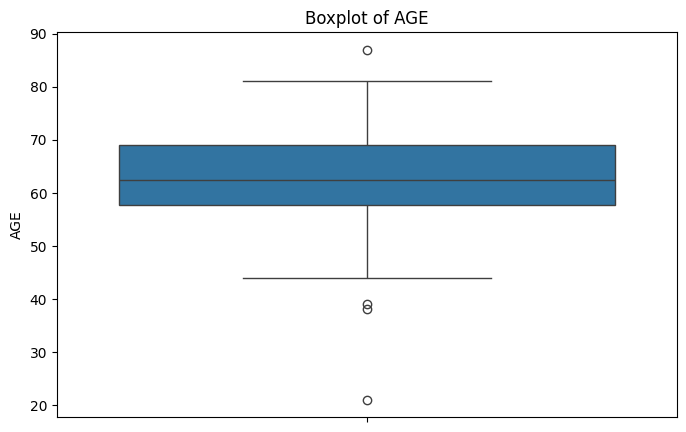

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['AGE'])
plt.title('Boxplot of AGE')
plt.ylabel('AGE')
plt.show()


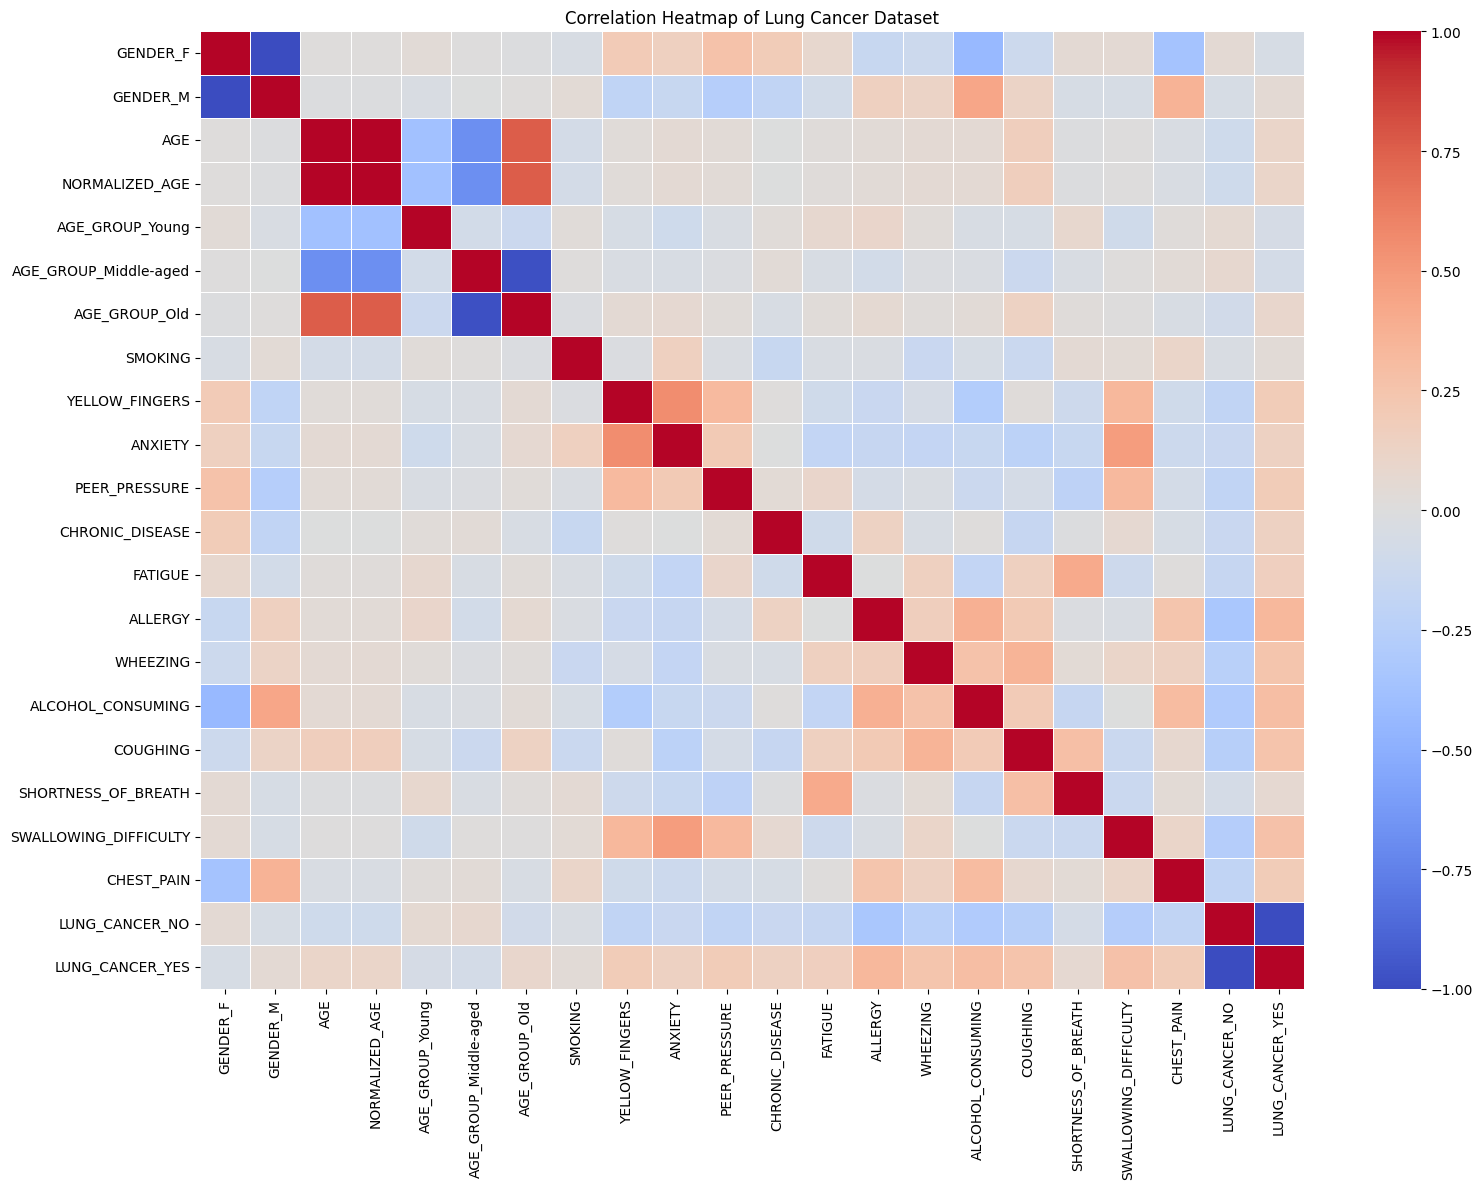

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16,12))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)

plt.title('Correlation Heatmap of Lung Cancer Dataset')
plt.tight_layout()
plt.show()


In [22]:
# Descriptive statistics for numerical columns
df = pd.read_csv('lung_cancer_preprocessed_data.csv')
df.describe()-


,GENDER_F,GENDER_M,AGE,NORMALIZED_AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,SMOKING,YELLOW_FINGERS,ANXIETY,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_NO,LUNG_CANCER_YES
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.485507,0.514493,62.909420,0.634991,0.010870,0.380435,0.608696,1.543478,1.576087,1.496377,...,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971,0.137681,0.862319
std,0.500698,0.500698,8.379355,0.126960,0.103877,0.486376,0.488929,0.499011,0.495075,0.500895,...,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191,0.345191
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,57.750000,0.556818,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,62.500000,0.628788,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,69.000000,0.727273,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [23]:
# Grouping by lung cancer outcome
df.groupby('LUNG_CANCER_YES').mean()

,GENDER_F,GENDER_M,AGE,NORMALIZED_AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,SMOKING,YELLOW_FINGERS,ANXIETY,...,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_NO
LUNG_CANCER_YES,,,,,,,,,,,,,,,,,,,,,
0,0.552632,0.447368,60.684211,0.601276,0.026316,0.473684,0.50000,1.50000,1.342105,1.315789,...,1.342105,1.473684,1.131579,1.236842,1.184211,1.263158,1.552632,1.131579,1.315789,1.0
1,0.474790,0.525210,63.264706,0.640374,0.008403,0.365546,0.62605,1.55042,1.613445,1.525210,...,1.550420,1.693277,1.613445,1.596639,1.609244,1.626050,1.642857,1.521008,1.596639,0.0


In [25]:
# ANOVA

from scipy.stats import f_oneway

group_yes = df[df['LUNG_CANCER_YES'] == 1]['AGE']
group_no = df[df['LUNG_CANCER_YES'] == 0]['AGE']

f_stat, p_value = f_oneway(group_yes, group_no)

print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 3.131771879279615
P-value: 0.07789243619285778


In [26]:
df.corr()

,GENDER_F,GENDER_M,AGE,NORMALIZED_AGE,AGE_GROUP_Young,AGE_GROUP_Middle-aged,AGE_GROUP_Old,SMOKING,YELLOW_FINGERS,ANXIETY,...,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER_NO,LUNG_CANCER_YES
GENDER_F,1.000000,-1.000000,0.013120,0.013120,0.037997,0.000325,-0.008396,-0.041131,0.202506,0.152032,...,0.079020,-0.150174,-0.121047,-0.434264,-0.120228,0.052893,0.048959,-0.361547,0.053666,-0.053666
GENDER_M,-1.000000,1.000000,-0.013120,-0.013120,-0.037997,-0.000325,0.008396,0.041131,-0.202506,-0.152032,...,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,-0.053666,0.053666
AGE,0.013120,-0.013120,1.000000,1.000000,-0.379034,-0.683897,0.760855,-0.073410,0.025773,0.050605,...,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,-0.106305,0.106305
NORMALIZED_AGE,0.013120,-0.013120,1.000000,1.000000,-0.379034,-0.683897,0.760855,-0.073410,0.025773,0.050605,...,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,-0.106305,0.106305
AGE_GROUP_Young,0.037997,-0.037997,-0.379034,-0.379034,1.000000,-0.082144,-0.130744,0.025926,-0.051495,-0.104072,...,0.074730,0.095377,0.025180,-0.045814,-0.051495,0.080261,-0.098201,0.022944,0.059524,-0.059524
AGE_GROUP_Middle-aged,0.000325,-0.000325,-0.683897,-0.683897,-0.082144,1.000000,-0.977326,0.014005,-0.037590,-0.046563,...,-0.041360,-0.081644,-0.021674,-0.027397,-0.128200,-0.033947,0.013820,0.036261,0.076748,-0.076748
AGE_GROUP_Old,-0.008396,0.008396,0.760855,0.760855,-0.130744,-0.977326,1.000000,-0.019440,0.048334,0.068431,...,0.025267,0.060954,0.016211,0.036988,0.138471,0.016718,0.007116,-0.040946,-0.088993,0.088993
SMOKING,-0.041131,0.041131,-0.073410,-0.073410,0.025926,0.014005,-0.019440,1.000000,-0.020799,0.153389,...,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,-0.034878,0.034878
YELLOW_FINGERS,0.202506,-0.202506,0.025773,0.025773,-0.051495,-0.037590,0.048334,-0.020799,1.000000,0.558344,...,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,-0.189192,0.189192
ANXIETY,0.152032,-0.152032,0.050605,0.050605,-0.104072,-0.046563,0.068431,0.153389,0.558344,1.000000,...,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,-0.144322,0.144322


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['LUNG_CANCER_YES', 'LUNG_CANCER_NO'])
y = df['LUNG_CANCER_YES']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (193, 20)
Testing set size: (83, 20)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R-squared: 0.39272301060816917
MSE: 0.08021803750131602


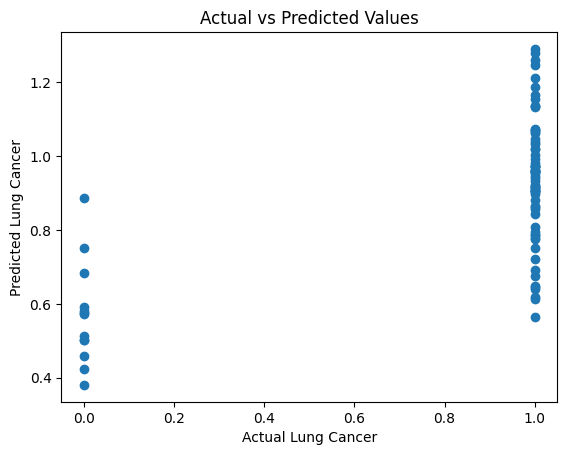

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Lung Cancer")
plt.ylabel("Predicted Lung Cancer")
plt.title("Actual vs Predicted Values")
plt.show()

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Ridge R-squared:", r2_score(y_test, ridge_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))

Ridge R-squared: 0.3931250929023973
Ridge MSE: 0.08016492458394811


In [31]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)

Best alpha: {'alpha': 10}
